## refine shoreline example

imports 

In [1]:
import refine_boundary

import matplotlib.pyplot as plt
import numpy as np

inputs

In [2]:
img_path = 'sample/20241211T052119_20241211T052515_T43NCE_sr.png'
boundary_path = 'sample/20241211T052119_20241211T052515_T43NCE_mask_sl.csv'

### refine shoreline - slope

initialize refiner

In [3]:
refiner = refine_boundary.boundary_refine(boundary_path, img_path)

run the shore-normal refinement (one type of refinement)

In [4]:
refiner.normal_thresholding()

array([[127.60551072, 151.08109946],
       [125.85317772, 151.09607765],
       [124.73707363, 151.10797254],
       [123.8213975 , 150.81727947],
       [122.60558734, 150.65271211],
       [121.25214719, 150.20130962],
       [119.83602504, 149.67449946],
       [118.6552833 , 148.86787385],
       [117.35817594, 148.21086395],
       [115.80593087, 148.10931707],
       [114.41115776, 147.56493491],
       [113.22821471, 146.51315678],
       [111.91973263, 145.83621243],
       [110.66574919, 145.07502335],
       [109.45563989, 144.2433177 ],
       [108.58628602, 142.96056453],
       [107.44263069, 142.03749423],
       [106.31767104, 141.0817432 ],
       [105.23787315, 140.09531149],
       [104.22585011, 139.07212476],
       [103.23431953, 138.0038558 ],
       [102.1736202 , 136.91496879],
       [101.03713647, 135.85048078],
       [ 99.94744844, 134.8198211 ],
       [ 99.37447534, 133.47505906],
       [ 98.54222416, 132.44735302],
       [ 97.72511513, 131.32469261],
 

output the refined boundary

In [5]:

bd_arr = refiner.refined_boundary

## visualize output - including process steps

In [6]:
#original shoreling
shoreline = refiner.shoreline
# points from nurbs curve
cp_arr = refiner.crv_pts
#refined shoreline
bd_arr = refiner.refined_boundary
#image used for sampling
img_arr = np.array(refiner.img)
#sampled values
sampled_nir = refiner.sample_values

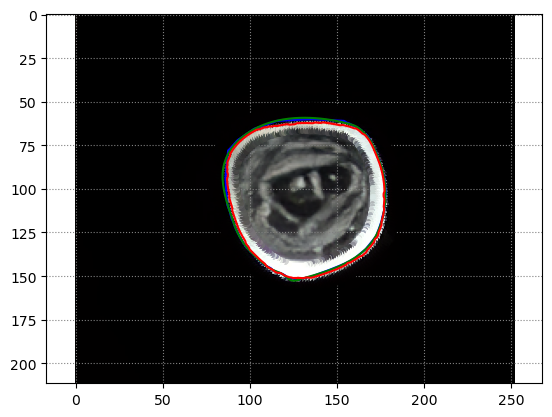

In [7]:
plt.axis('equal')
plt.rcParams['figure.figsize'] = [25, 25]
plt.grid(linestyle=':', color='0.5') 
plt.gca().invert_yaxis()
plt.imshow(img_arr)

for t_s in sampled_nir:
    for pt in t_s:
        pixel = np.array([pt[2][0]/255,pt[2][1]/255,pt[2][2]/255])
        plt.plot(pt[0], pt[1], '.',ms=5,color=pixel)

plt.plot(shoreline[:,0],shoreline[:,1],color='blue')
plt.plot(cp_arr[:,0],cp_arr[:,1],color='green')
plt.plot(bd_arr[:,0],bd_arr[:,1],color='red')

plt.show()